# 6. seaborn
* matplotlib을 기반으로 다양한 색상테마와 통계용 그래프 기능을 추가한 시각화 라이브러리 
* seaborn에서만 제공되는 통계기반 plot : countplot, boxplot, violinplot, heatmap
* DataFrame을 이용해서 데이터를 시각화하는데 유용함


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
# seaborn에서 제공하는 datasets
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [18]:
df.shape

(144, 3)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [20]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [21]:
df.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [22]:
df.year.value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

## 6-1. Line Plot
* 선 주위의 파란색은 데이터의 신뢰구간을 표시

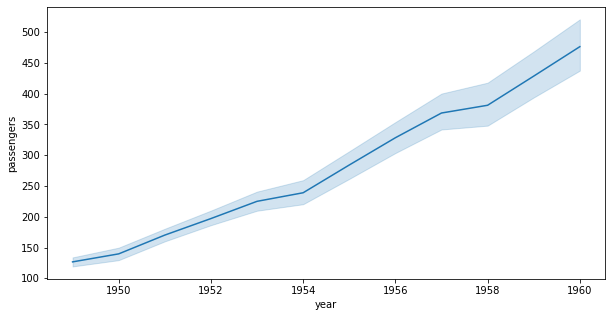

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='passengers', data=df)
plt.show()

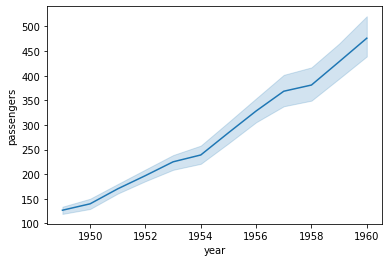

In [24]:
sns.lineplot(x=df.year, y=df.passengers)
plt.show()

## 6-2. Scatter Plot

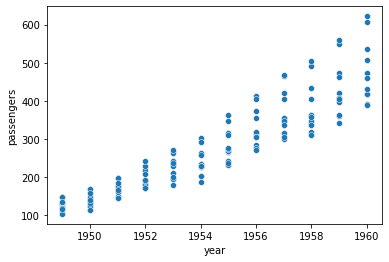

In [26]:
sns.scatterplot(x='year', y='passengers', data=df)
plt.show()

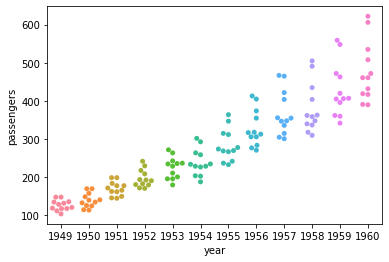

In [27]:
# 겹치지 않게 그려줌
sns.swarmplot(x='year', y='passengers', data=df)
plt.show()

## 6-3. Bar Plot
* x데이터에 대한 y데이터 평균값으로 막대그래프를 그려줌
* 검정색 막대(에러비): 편차

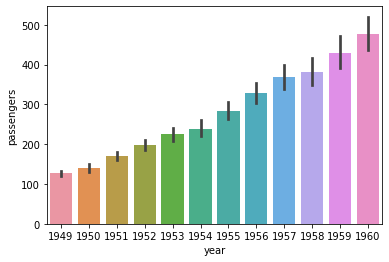

In [30]:
sns.barplot(x='year', y='passengers', data=df)
plt.show()

In [31]:
df.loc[df.year == 1960, 'passengers'].std()

77.73712501797714

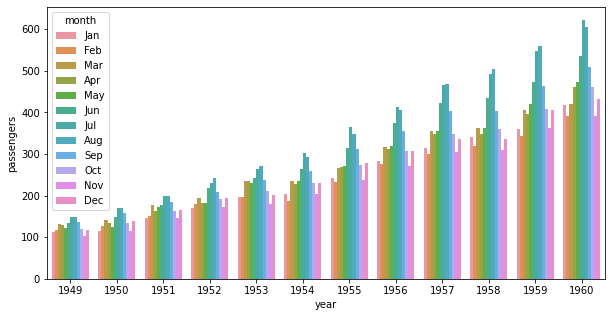

In [33]:
# hue를 지정하면 분류를 한 번 더해줌
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='passengers', hue='month', data=df)
plt.show()

In [34]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


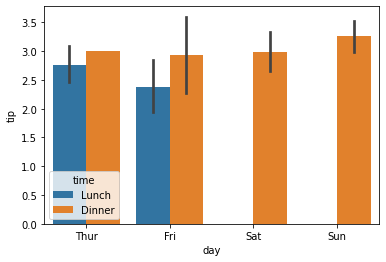

In [36]:
sns.barplot(x='day', y='tip', hue='time', data=tips)
plt.show()

## 6-4. Count Plot
* x축에 해당하는 데이터가 몇 개 있는지 보여줌

In [37]:
sns.countplot?

Signature:
sns.countplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  variables will determine how the data are plotted.
- A "wide-form" DataFrame, such that each numeric column will be plotted.
- An array or list of vectors.

In most cases, it 